In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
ann_data = json.load(open("data_recommended/v2/annotations/nlq_train.json"))
fho_sta_data = json.load(open("data_recommended/v2/annotations/fho_sta_train.json"))

In [11]:
# please see https://ego4d-data.org/docs/data/annotations-schemas/
def get_all_keys(d):
    keys = []
    for key, value in d.items():
        keys.append(key)
        if isinstance(value, dict):
            keys.extend(get_all_keys(value))
    return keys

# Use this function to extract all keys
all_keys = get_all_keys(fho_sta_data)
print(all_keys)



['info', 'description', 'version', 'split', 'include_annotations', 'video_metadata', '26202090-684d-4be8-b3cc-de04da827e91', 'frame_width', 'frame_height', 'fps', 'd8c894ab-7b08-4983-9e80-fdb5d6ee0202', 'frame_width', 'frame_height', 'fps', 'cde41c4f-50d1-4910-9f2a-4c7b6987df92', 'frame_width', 'frame_height', 'fps', '5b97f47f-f015-46f3-8879-3fcc2a61a728', 'frame_width', 'frame_height', 'fps', '3b609b23-f91d-43da-9918-ce928181f53f', 'frame_width', 'frame_height', 'fps', '9b316b36-7f09-450d-b397-1961723fefb7', 'frame_width', 'frame_height', 'fps', '7f9f75fd-a660-4635-8890-239c6ad82023', 'frame_width', 'frame_height', 'fps', 'c9c44dea-c37b-461d-aa14-20e934126df5', 'frame_width', 'frame_height', 'fps', '9239bf0f-db8c-4378-866d-15f302da08b5', 'frame_width', 'frame_height', 'fps', '6efe176a-ad32-4142-9785-14921ffbda23', 'frame_width', 'frame_height', 'fps', 'fe4ee880-6cae-4f62-9d4b-fda767dda6bf', 'frame_width', 'frame_height', 'fps', '3f0aa3e8-6c8c-4eab-ad6e-00d3876768d8', 'frame_width', 'f

In [6]:
# please see https://ego4d-data.org/docs/data/annotations-schemas/

anns = []
for vid in ann_data["videos"]:
    for clip in vid["clips"]:
        for ann in clip["annotations"]:
            for query in ann["language_queries"]:
                anns.append({
                    "query_start_time_sec": clip["video_start_sec"],
                    "query_end_time_sec": clip["video_end_sec"],
                    "query_response_start_time_sec": query["video_start_sec"],
                    "query_response_end_time_sec": query["video_end_sec"],
                    "query_template": query.get("template", None),
                    "query": query.get("query", None),
                })

In [7]:
num_queries = len(anns)
relative_query_sizes = np.array([
    (a["query_response_end_time_sec"] - a["query_response_start_time_sec"]) / (a["query_end_time_sec"] - a["query_start_time_sec"])
    for a in anns
])
query_sizes = np.array([
    (a["query_response_end_time_sec"] - a["query_response_start_time_sec"])
    for a in anns
])
clip_sizes = np.array([
    (a["query_end_time_sec"] - a["query_start_time_sec"])
    for a in anns
])

In [8]:
query_sizes.max(), query_sizes.min(), query_sizes.std()

(np.float64(480.0),
 np.float64(0.13333000000000084),
 np.float64(23.622978784331774))

In [9]:
# less than or equal to 4 frames => 9% of training data
(query_sizes <= 4/30).sum() / len(relative_query_sizes)

np.float64(7.220737959419453e-05)

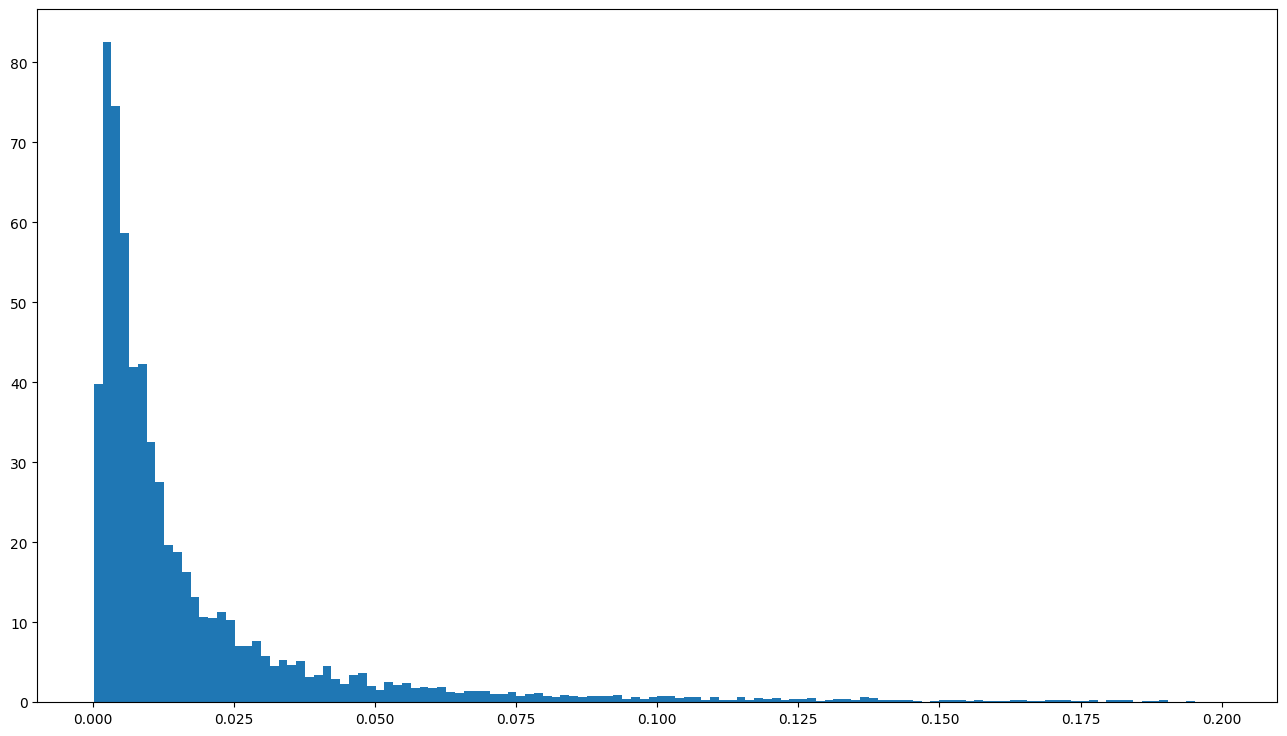

In [11]:
plt.rcParams["figure.figsize"] = (16, 9)
plt.hist(relative_query_sizes[relative_query_sizes < 0.2], density=True, bins=128)
plt.show()

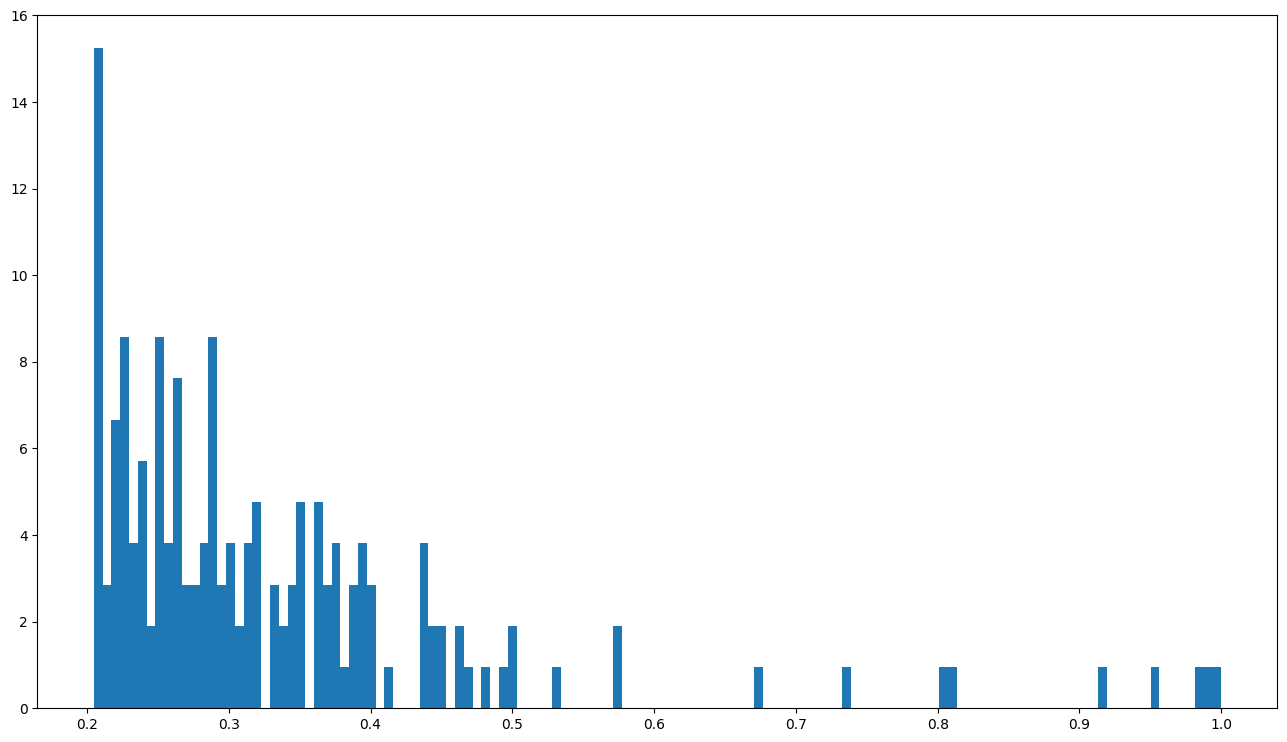

In [12]:
plt.hist(relative_query_sizes[relative_query_sizes > 0.2], density=True, bins=128)
plt.show()

In [13]:
clip_sizes.mean(), clip_sizes.max(), clip_sizes.min(), clip_sizes.std(), np.median(clip_sizes)

(np.float64(529.4506893553271),
 np.float64(1200.1333333333332),
 np.float64(207.16666666666674),
 np.float64(206.1545925371941),
 np.float64(480.0))